<a href="https://colab.research.google.com/github/RigoVegaE/ComputoNube/blob/main/5_3_Equipo_1_Google_Colab_Algoritmos_de_mejoramiento_de_im%C3%A1genes_en_el_dominio_de_Fourier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

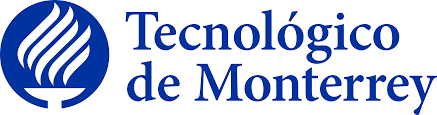

#**Maestría en Inteligencia Artificial Aplicada**
##**Curso: Visión computacional para imágenes y video**
###Tecnológico de Monterrey
###Dr. Gilberto Ochoa Ruiz

## 5.3 Google Colab algoritmos de mejoramiento de imágenes en el dominio de Fourier



**Por:**

* A01183284 RODRIGO RODRIGUEZ RODRIGUEZ
* A01793132 RIGOBERTO VEGA ESCUDERO
* A01016308 ALEXIS HERNANDEZ MARTINEZ
* A00820656 JUAN ALFONSO VASQUEZ CHAPOI
* A00759664 JOEL ORLANDO HERNANDEZ RAMOS

##5.3

El proyecto con el Google Collab modificado y las respuestas a los ejercicios se deben convertir en PDF y también en archivo comprimido y entregarse vía Canvas.
Los ejercicios que deben agregarse a este proyecto serán los siguientes:

 a) Investigar una aplicación de mejoramiento de imágenes usando transformada de Fourier usando filtro pasabajas. Realizar una demo sencilla en Google collab. De preferencia probar los tres tipo de filtros básicos

b) Investigar una aplicación de mejoramiento de imágenes usando transformada de Fourier usando filtro pasa altas. Realizar una demo sencilla en Google collab. De preferencia probar los tres tipo de filtros básicos

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
import numpy as np
import pandas as pd
import cv2 as cv 
from google.colab.patches import cv2_imshow # for image display
from skimage import io
from PIL import Image 
import matplotlib.pylab as plt
import matplotlib.image as mpig
%matplotlib inline

from math import sqrt,exp

In [3]:
def gethistogram(im,title):
  hist_full = cv.calcHist([im],[0],None,[256],[0,256])
  plt.plot(hist_full)
  plt.title(title)
  plt.show()

In [6]:
def distance(point1,point2):
    return sqrt((point1[0]-point2[0])**2 + (point1[1]-point2[1])**2)

def idealFilterLP(D0,imgShape):
    base = np.zeros(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            if distance((y,x),center) < D0:
                base[y,x] = 1
    return base

def idealFilterHP(D0,imgShape):
    base = np.ones(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            if distance((y,x),center) < D0:
                base[y,x] = 0
    return base

def butterworthLP(D0,imgShape,n):
    base = np.zeros(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            base[y,x] = 1/(1+(distance((y,x),center)/D0)**(2*n))
    return base

def butterworthHP(D0,imgShape,n):
    base = np.zeros(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            base[y,x] = 1-1/(1+(distance((y,x),center)/D0)**(2*n))
    return base

def gaussianLP(D0,imgShape):
    base = np.zeros(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            base[y,x] = exp(((-distance((y,x),center)**2)/(2*(D0**2))))
    return base

def gaussianHP(D0,imgShape):
    base = np.zeros(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            base[y,x] = 1 - exp(((-distance((y,x),center)**2)/(2*(D0**2))))
    return base

## **Introducción**

La transformada de Fourier se utiliza para analizar las características de frecuencia de varios filtros. Para las imágenes, se utiliza la transformada discreta de Fourier (DFT) 2D para encontrar el dominio de la frecuencia. Los filtros de dominio de frecuencia se utilizan para suavizar y mejorar la nitidez de las imágenes mediante la eliminación de componentes de alta o baja frecuencia.

Los filtros de dominio de frecuencia son diferentes de los filtros de dominio espacial, ya que se centran principalmente en la frecuencia de las imágenes. Se realiza para dos operaciones básicas, es decir, suavizado y afilado.

Los filtros de frecuencia procesan una imagen en el dominio de la frecuencia. La imagen se transforma por Fourier, se multiplica con la función de filtro y luego se vuelve a transformar en el dominio espacial. La atenuación de las frecuencias altas da como resultado una imagen más suave en el dominio espacial, la atenuación de las frecuencias bajas mejora los bordes.

Se utiliza un algoritmo rápido llamado Transformada Rápida de Fourier (FFT) para el cálculo de DFT. Los detalles sobre estos se pueden encontrar en cualquier libro de texto de procesamiento de imágenes o procesamiento de señales.




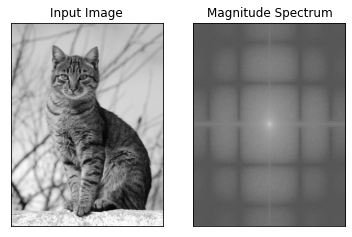

In [5]:
Fou_URL = "/content/drive/MyDrive/Colab Notebooks/Computo imagen y video/5.3Images/Cat_fourier.jpg"
Fou_image = cv.imread(Fou_URL,cv.IMREAD_GRAYSCALE) 
# Blur the grayscale image by a Guassian filter with kernel size of 10
imBlur = cv.blur(Fou_image,(5,5))
# Transform the image to frequency domain
f = np.fft.fft2(imBlur)
# Bring the zero-frequency component to the center
fshift = np.fft.fftshift(f)
magnitude_spectrum = 30*np.log(np.abs(fshift))

plt.subplot(121),plt.imshow(imBlur, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

## 1. Investigar una aplicación de mejoramiento de imágenes usando transformada de Fourier usando filtro pasabajas. Realizar una demo sencilla en Google collab. De preferencia probar los tres tipo de filtros básicos

El filtro de paso bajo es el tipo de filtro de dominio de frecuencia que se utiliza para suavizar la imagen. Atenúa los componentes de alta frecuencia y preserva los componentes de baja frecuencia.

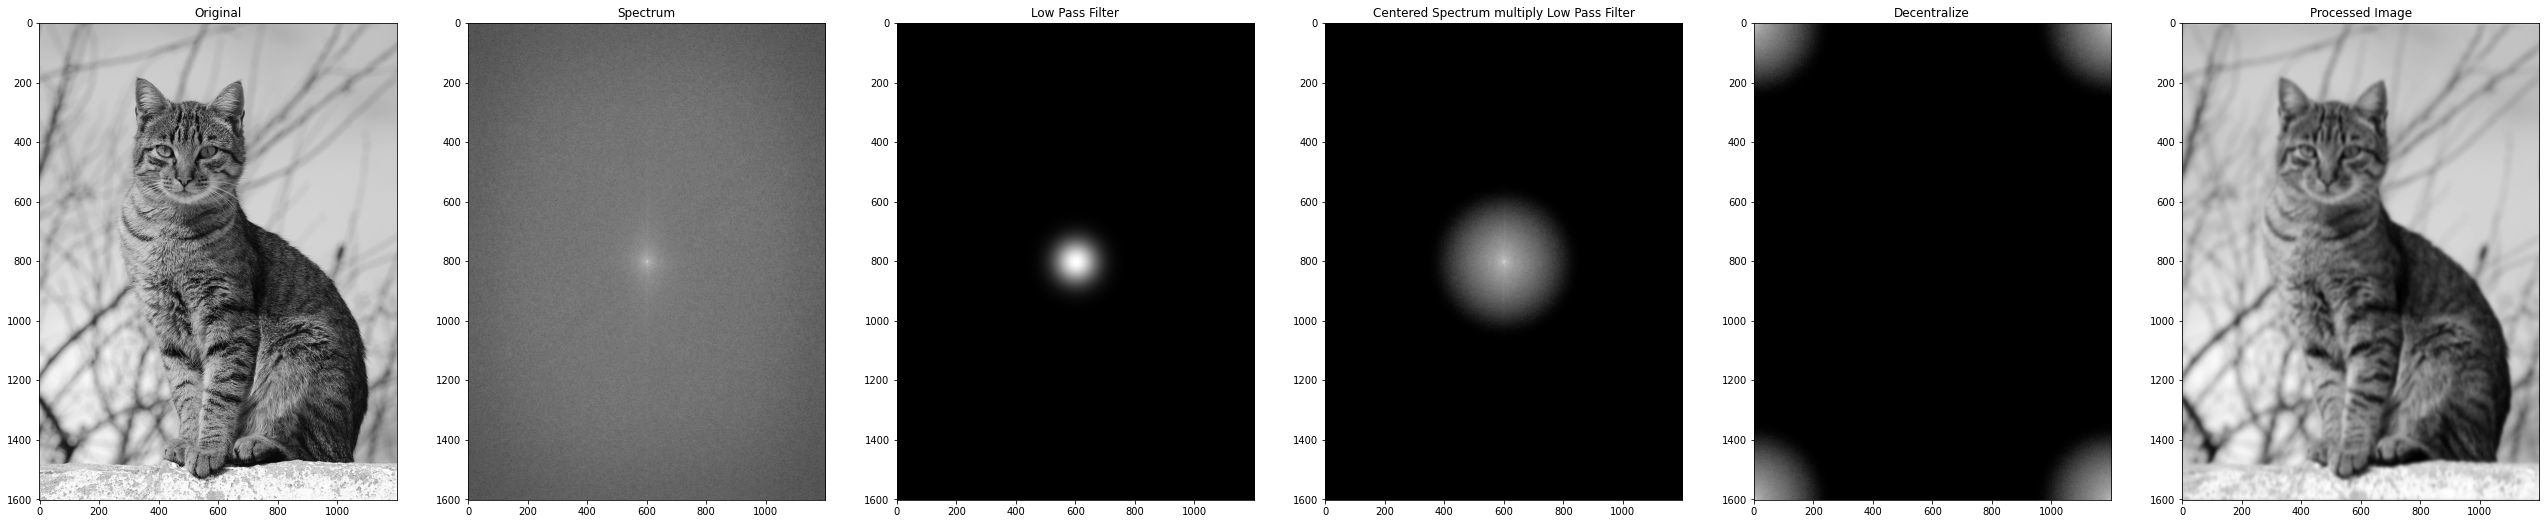

In [17]:
Fou_URL = "/content/drive/MyDrive/Colab Notebooks/Computo imagen y video/5.3Images/Cat_fourier.jpg"
Fou_image = cv.imread(Fou_URL,cv.IMREAD_GRAYSCALE)
original = np.fft.fft2(Fou_image)
center = np.fft.fftshift(original)

plt.figure(figsize=(6.4*7, 4.8*7), constrained_layout=False)

plt.subplot(161), plt.imshow(Fou_image, cmap = 'gray'), plt.title("Original")

plt.subplot(162), plt.imshow(np.log(1+np.abs(center)), "gray"), plt.title("Spectrum")

LowPass = gaussianLP(50,Fou_image.shape)
plt.subplot(163), plt.imshow(np.abs(LowPass), "gray"), plt.title("Low Pass Filter")

LowPassCenter = center * gaussianLP(50,Fou_image.shape)
plt.subplot(164), plt.imshow(np.log(1+np.abs(LowPassCenter)), "gray"), plt.title("Centered Spectrum multiply Low Pass Filter")

LowPass = np.fft.ifftshift(LowPassCenter)
plt.subplot(165), plt.imshow(np.log(1+np.abs(LowPass)), "gray"), plt.title("Decentralize")

inverse_LowPass = np.fft.ifft2(LowPass)
plt.subplot(166), plt.imshow(np.abs(inverse_LowPass), "gray"), plt.title("Processed Image")

plt.show()


>Aplicación

Esta imagen filtrada de paso bajo se ve mucho más borrosa. Pero, ¿por qué querrías una imagen más borrosa? A menudo, las imágenes pueden tener ruido; no importa cuán buena sea la cámara, siempre agrega una cantidad de "nieve" a la imagen. La naturaleza estadística de la luz en sí también contribuye al ruido en la imagen.

El ruido siempre cambia rápidamente de píxel a píxel porque cada píxel genera su propio ruido independiente. La imagen del telescopio no está "descorrelacionada" de esta manera porque las imágenes reales se distribuyen en muchos píxeles. Entonces, el filtro de paso bajo afecta más al ruido que a la imagen. Al suprimir el ruido, se pueden ver cambios graduales que antes eran invisibles. Por lo tanto, a veces se puede usar un filtro de paso bajo para resaltar detalles tenues que fueron sofocados por el ruido.

MaxIm DL le permite aplicar selectivamente un filtro de paso bajo a un cierto rango de brillo en la imagen. Esto le permite suavizar selectivamente el fondo de la imagen, dejando intactas las áreas brillantes. Este es un excelente compromiso porque los objetos más débiles en el fondo son los más ruidosos y no degrada la nitidez de los objetos brillantes en primer plano.

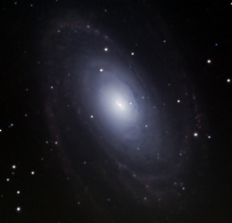

(<matplotlib.axes._subplots.AxesSubplot at 0x7f0362b5bee0>,
 Text(0.5, 1.0, 'Processed Image Low Pass Filter'))

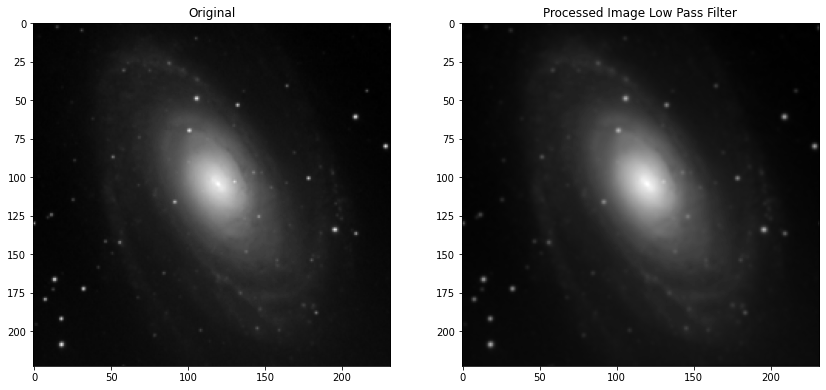

In [72]:
Fou_URL_Apl = "/content/drive/MyDrive/Colab Notebooks/Computo imagen y video/5.3Images/Galaxia LPF.png"
Fou_image_APL = cv.imread(Fou_URL_Apl)
cv2_imshow(cv.cvtColor(Fou_image_APL, cv.COLOR_BGR2RGB))
Fou_image_APL = cv.cvtColor(Fou_image_APL, cv.COLOR_BGR2GRAY)
original = np.fft.fft2(Fou_image_APL)
center = np.fft.fftshift(original)
plt.figure(figsize=(6.4*7, 4.8*7), constrained_layout=False)

plt.subplot(161), plt.imshow(Fou_image_APL, cmap = 'gray'), plt.title("Original")

LowPass = gaussianLP(50,Fou_image_APL.shape)
LowPassCenter = center * gaussianLP(50,Fou_image_APL.shape)
LowPass = np.fft.ifftshift(LowPassCenter)
inverse_LowPass = np.fft.ifft2(LowPass)
plt.subplot(162), plt.imshow(np.abs(inverse_LowPass), "gray"), plt.title("Processed Image Low Pass Filter")




Una aplicacion como la que podemos ver en el libro de Gonzalez, R. & Woods, R. (2018) es en el uso Medico, abaajo el objetivo de este ejemplo es denotar los detales de la imagen utilizando filtrado de énfasis de baja frecuencia. La resonancias magneneticas pueden mostrar detalles significantes pero muchas tienden a ser una escala de grises ligeramente borrosa, también aprovechamos esta oportunidad para dar un ejemplo de cómo se puede usar el procesamiento del dominio espacial para complementar el dominio de la frecuencia.

Esta imagen caracterizada por niveles de intensidad en un rango estrecho de la escala de grises es un candidato ideal para la ecualización de histogramas. Como se muestra este fue de hecho un método apropiado para mejorar aún más la imagen. Si notamos pudimos obtener en base al trato de la imagen por medio del GFLP obteniendo una mascara para luego sumarla la imagen original y con ello depsues aplicar la ecualizacion de la imagen, pudimos obtener una mejor claridad de los detalles de la imagenes de base de la misma, denotando los detalles de las partes activas del cerebro.

(<matplotlib.axes._subplots.AxesSubplot at 0x7f03628391c0>,
 Text(0.5, 1.0, 'Final'))

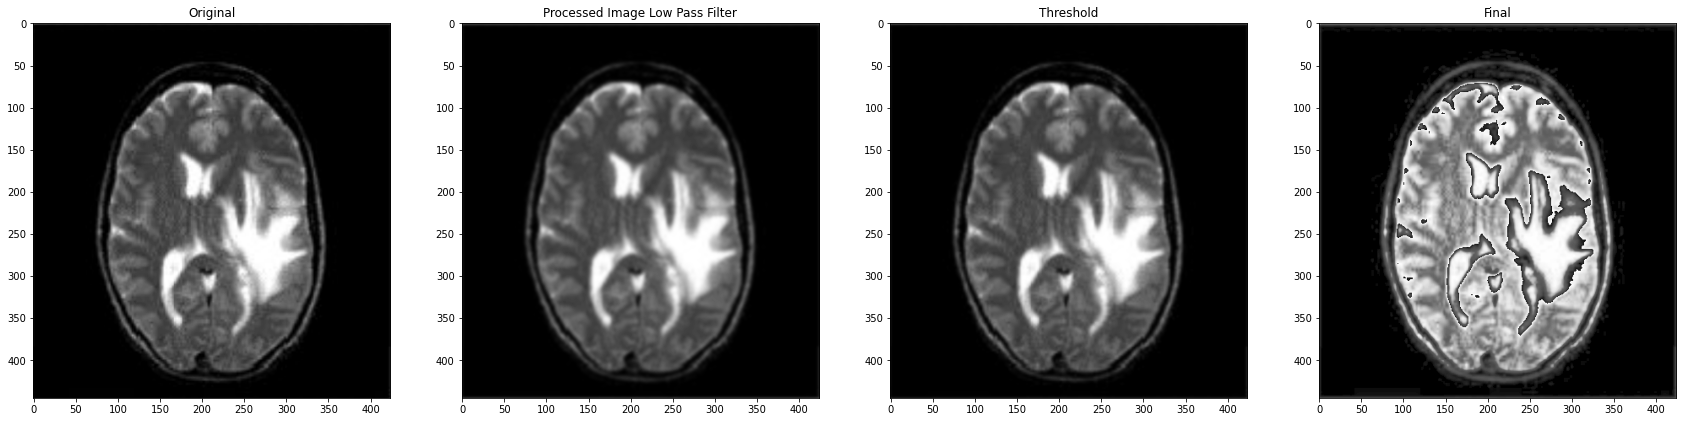

In [63]:
Fou_URL_Apl = "/content/drive/MyDrive/Colab Notebooks/Computo imagen y video/5.3Images/Cerebro LPF.PNG"
Fou_image_APL = cv.imread(Fou_URL_Apl)
Fou_image_APL = cv.cvtColor(Fou_image_APL, cv.COLOR_BGR2GRAY)
original = np.fft.fft2(Fou_image_APL)
center = np.fft.fftshift(original)
plt.figure(figsize=(6.4*7, 4.8*7), constrained_layout=False)

plt.subplot(161), plt.imshow(Fou_image_APL, cmap = 'gray'), plt.title("Original")

LowPass = gaussianLP(50,Fou_image_APL.shape)
LowPassCenter = center * gaussianLP(50,Fou_image_APL.shape)
LowPass = np.fft.ifftshift(LowPassCenter)
inverse_LowPass = np.fft.ifft2(LowPass)
plt.subplot(162), plt.imshow(np.abs(inverse_LowPass), "gray"), plt.title("Processed Image Low Pass Filter")

threshold = inverse_LowPass + Fou_image_APL
plt.subplot(163), plt.imshow(np.abs(threshold), "gray"), plt.title("Threshold")


# threshold = cv.cvtColor(threshold, cv.COLOR_BGR2GRAY)
# 
equ = cv.equalizeHist(np.abs(threshold).astype(np.uint8))

#Convert LAB image back to color (RGB)
plt.subplot(164), plt.imshow(np.abs(equ), "gray"), plt.title("Final")

##2. Investigar una aplicación de mejoramiento de imágenes usando transformada de Fourier usando filtro pasa altas. Realizar una demo sencilla en Google collab. De preferencia probar los tres tipo de filtros básicos

El filtro de paso alto es el tipo de filtro de dominio de frecuencia que se utiliza para agudizar la imagen. Atenúa los componentes de baja frecuencia y preserva los componentes de alta frecuencia.

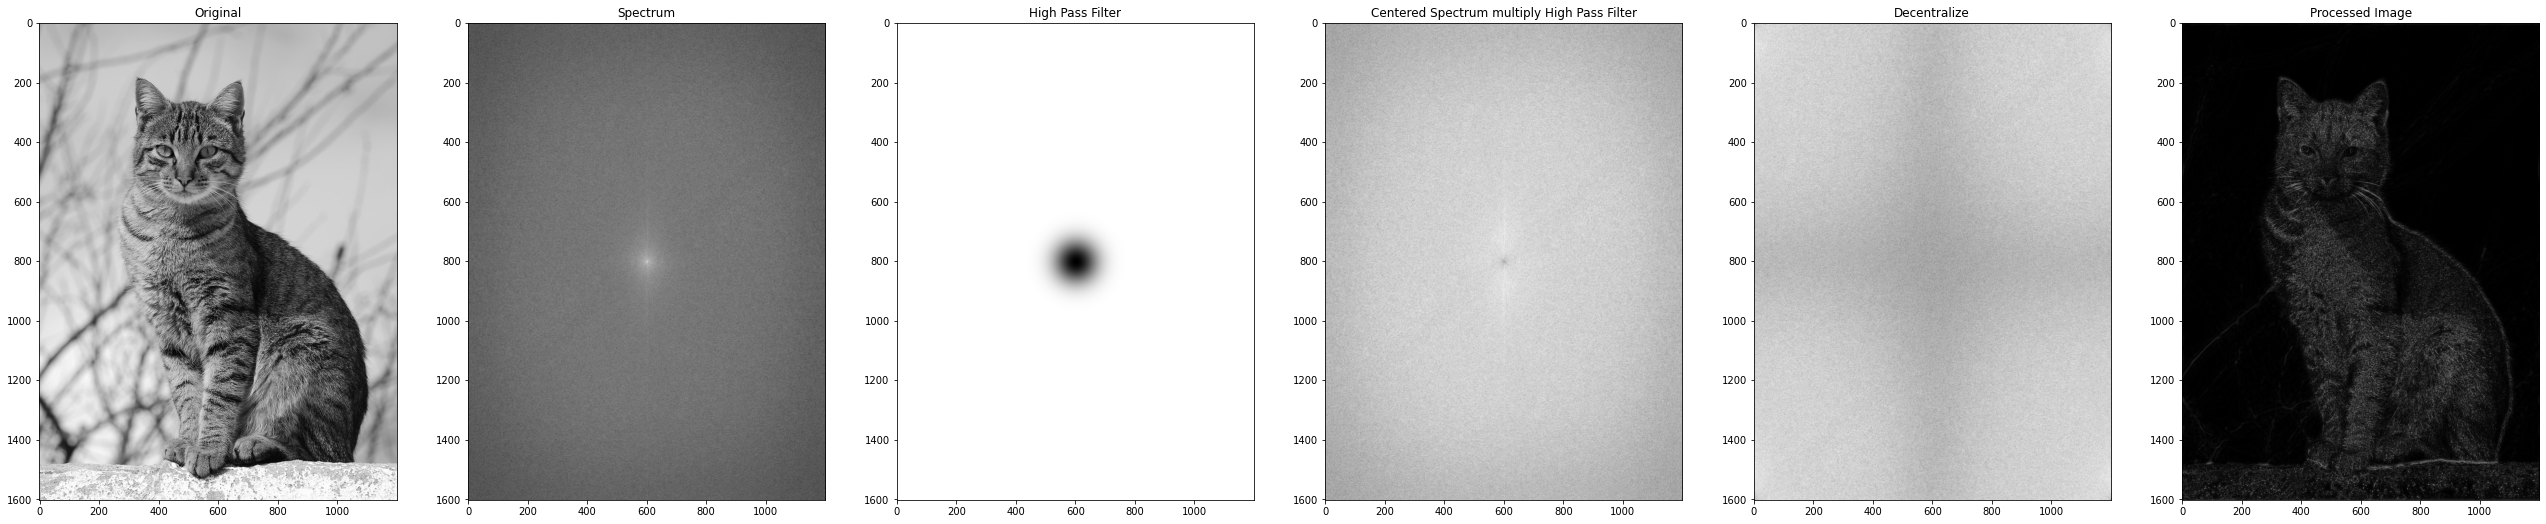

In [23]:
Fou_URL = "/content/drive/MyDrive/Colab Notebooks/Computo imagen y video/5.3Images/Cat_fourier.jpg"
Fou_image = cv.imread(Fou_URL,cv.IMREAD_GRAYSCALE)
original = np.fft.fft2(Fou_image)
center = np.fft.fftshift(original)

plt.figure(figsize=(6.4*7, 4.8*7), constrained_layout=False)

plt.subplot(161), plt.imshow(Fou_image, cmap = 'gray'), plt.title("Original")

plt.subplot(162), plt.imshow(np.log(1+np.abs(center)), "gray"), plt.title("Spectrum")

HighPass = gaussianHP(50,Fou_image.shape)
plt.subplot(163), plt.imshow(np.abs(HighPass), "gray"), plt.title("High Pass Filter")

HighPassCenter = center * gaussianHP(50,Fou_image.shape)
plt.subplot(164), plt.imshow(np.log(1+np.abs(HighPassCenter)), "gray"), plt.title("Centered Spectrum multiply High Pass Filter")

HighPass = np.fft.ifftshift(HighPassCenter)
plt.subplot(165), plt.imshow(np.log(1+np.abs(HighPass)), "gray"), plt.title("Decentralize")

inverse_HighPass = np.fft.ifft2(HighPass)
plt.subplot(166), plt.imshow(np.abs(inverse_HighPass), "gray"), plt.title("Processed Image")

plt.show()

>Aplicación

Una aplicacion como la que podemos ver en el libro de Gonzalez, R. & Woods, R. (2018) es en el uso Medico, abaajo el objetivo de este ejemplo es mejorar la imagen utilizando filtrado de énfasis de alta frecuencia. Los rayos X no se pueden enfocar de la misma manera que las lentes ópticas, y las imágenes resultantes generalmente tienden a ser una escala de grises ligeramente borrosa, también aprovechamos esta oportunidad para dar un ejemplo de cómo se puede usar el procesamiento del dominio espacial para complementar el dominio de la frecuencia.

Esta imagen caracterizada por niveles de intensidad en un rango estrecho de la escala de grises es un candidato ideal para la ecualización de histogramas. Como se muestra este fue de hecho un método apropiado para mejorar aún más la imagen. Note la claridad de la estructura ósea y otros detalles que simplemente no son visibles en ninguna de las otras tres imágenes. La imagen mejorada final es un poco ruidosa, pero esto es típico de las imágenes de rayos X cuando se expande su escala de grises. El resultado obtenido usando una combinación de énfasis de alta frecuencia y ecualización de histogramas es superior al resultado que se obtendría usando cualquiera de los métodos solos.

(<matplotlib.axes._subplots.AxesSubplot at 0x7f03626ac430>,
 Text(0.5, 1.0, 'Final'))

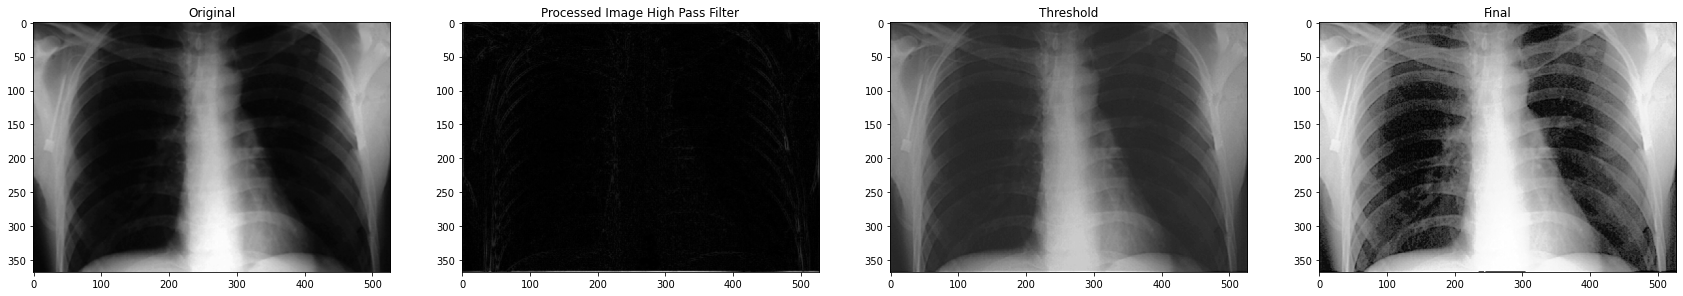

In [64]:
Fou_URL_Apl = "/content/drive/MyDrive/Colab Notebooks/Computo imagen y video/5.3Images/Costillas HPF.PNG"
Fou_image_APL = cv.imread(Fou_URL_Apl)
Fou_image_APL = cv.cvtColor(Fou_image_APL, cv.COLOR_BGR2GRAY)
original = np.fft.fft2(Fou_image_APL)
center = np.fft.fftshift(original)
plt.figure(figsize=(6.4*7, 4.8*7), constrained_layout=False)

plt.subplot(161), plt.imshow(Fou_image_APL, cmap = 'gray'), plt.title("Original")

HighPass = gaussianHP(50,Fou_image_APL.shape)

HighPassCenter = center * gaussianHP(50,Fou_image_APL.shape)

HighPass = np.fft.ifftshift(HighPassCenter)

inverse_HighPass = np.fft.ifft2(HighPass)
plt.subplot(162), plt.imshow(np.abs(inverse_HighPass), "gray"), plt.title("Processed Image High Pass Filter")


threshold = inverse_HighPass + Fou_image_APL
plt.subplot(163), plt.imshow(np.abs(threshold), "gray"), plt.title("Threshold")


# threshold = cv.cvtColor(threshold, cv.COLOR_BGR2GRAY)
# 
equ = cv.equalizeHist(np.abs(threshold).astype(np.uint8))

#Convert LAB image back to color (RGB)
plt.subplot(164), plt.imshow(np.abs(equ), "gray"), plt.title("Final")


#Referencias

- Dayal, D. (20 de 10 de 2021). Frequency Domain Filtering on an Image using OpenCV. Obtenido de https://medium.com/@devangdayal/frequency-domain-filtering-on-an-image-using-opencv-26bfcc97e23b

- First Principles of Computer Vision. (2 de marzo de 2021). Image Filtering in Frequency Domain | Image Processing II [Archivo de video]. Youtube.  https://www.youtube.com/watch?v=OOu5KP3Gvx0

- Gonzalez, R. & Woods, R. (2018). Digital Image Processing. 4° Edition. Pearson.

- OpenCV. (2023). Fourier Transform. Obtenido de https://docs.opencv.org/3.4/de/dbc/tutorial_py_fourier_transform.html

- Rosebrock, A. (15 de 06 de 2020). OpenCV Fast Fourier Transform (FFT) for blur detection in images and video streams. Obtenido de https://pyimagesearch.com/2020/06/15/opencv-fast-fourier-transform-fft-for-blur-detection-in-images-and-video-streams/

- Ruiz, G. O. (2023). Tema 2.3 Mejoramiento de Imágenes usando Fourier. 


